# Unsupervised Learning, Quick Look
* Let's look at the sklearn offerings:
    - https://scikit-learn.org/stable/unsupervised_learning.html
    - There's a lot here, we're going to consider just a couple applicable things


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## What is Unsupervised Learning?

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

## Why Unsupervised Learning?
* Sometimes we don't have labels
* We are trying to discern signal/relationships
    * Do relationships exist?
* In many instances, we use Unsupervised learning as a form of Exploratory Data Analysis
* Clustering
* Distribution Similarity
* Cool Visualizations
    * eg t-SNE
* Feature Engineering


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

## Cluster Analysis
* Discern similar groups
* Quickly apply "labels" to a dataset
    * do this with much caution
* Fundamental Algorithms to know:
    * [K-Means](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py)
        * We'll look at K-means below
    * [Hierarchical Clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)
    * [DBScan](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py)
* Big Question: **How do we evaluate Cluster Performance?**    
    * This is hard and can be misleading, so proceed with caution.
    * Recall **Curse of Dimensionality**
    
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## Dimensional Reduction and Projection
* PCA/SVD is often applied, often as a data preprocessing technique
* t-SNE

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

## K-Means on MNIST Digits
* Straight from SKLearn's docs
* very susceptible to **Curse of Dimensionality**
    * Notice we can reduce the dimensions via PCA
* Silhouette Score may be misleading
    * Explore why via scaling vs not scaling:
        * https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

__________________________________________________________________________________


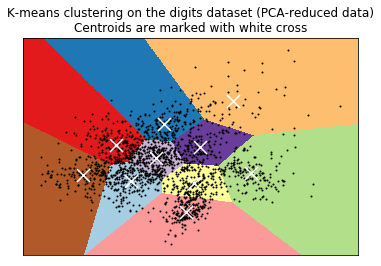

In [26]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)
# data = digits.data

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300


# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)


print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)


# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])



# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)





# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
#### Silhouette Score as a "Performance Metrics"
* higher silhoutte indicates better defined clusters
    * from 0-1
    * how meaningful is this?
        * Can we CrossVal/compare the scores for different numbers of clusters on a dataset?
* $\frac{1}{m} \sum_1^ms=\frac{b-a}{max(a,b}$
    * $m$ : number of samples
    * $a$ : mean dist betw a sample and all other points in the same class
    * $b$ : mean dist betw a samle and all other points in the nearest cluster
* Consider scaled data vs nonscaled data
    * scaling here means to ignore distribution shape and transform data to center by removing the mean value of each feature, then scaling it by dividing non-constant features by standard deviation
        * centers features around zero and make variance similar
* [Silhoutte Score Examples](https://github.com/clownfragment/a-smarter-flashcard/tree/master/images/silhouette_plots)

In [27]:
from sklearn import metrics

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print(metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size))

bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)

0.14147393692864546


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

## t-SNE, PCA and k-Means in a Recommender 
* t-SNE is Neat
* Let's look at a process via one of [my projects](https://github.com/clownfragment/a-smarter-flashcard)

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## What are you doing for your project?
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>